# Extensión de funciones a intervalos

#[1]
####Amplía tu módulo de intervalos para que incluya la extensión de las funciones estándres monótonas a intervalos. En el caso de las potencias, extiénde lo que ya hayas hecho para que incluya potencias reales. Incluye algunas pruebas en `pruebas.jl` que muestren que lo que has hecho funciona bien.

In [1]:
using Intervalos, PyPlot
using Graficador # es un módulo que yo defini que incluye una función para graficar la acción de
                    # evaluar una función en un Intervalo

INFO: Loading help data...


In [2]:
methods(Intervalo)

# 3 methods for generic function "Intervalo":
Intervalo(a::BigFloat,b::BigFloat) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:15
Intervalo(a,b) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:30
Intervalo(a) at /home/santiago/Documentos/Escuela-maestría/1er-semestre/Física-computacional/Clase/MisModulos/Intervalos/src/Intervalos.jl:32

In [3]:
inter1=Intervalo("2","2.5")
inter2=Intervalo("0","0.5")

[0e+00,
5e-01]

####Lo siguiente era parte del código pero ahora es texto porque está incluido en el módulo Intervalos

function redonUP(f::Function,x,y)
    with_rounding(BigFloat,RoundUp) do 
        f(BigFloat(x),BigFloat(y)) 
    end
end

function redonDOWN(f::Function,x,y)
    with_rounding(BigFloat,RoundDown) do 
        f(BigFloat(x),BigFloat(y))
    end
end

function redonUP(f::Function,x)
    with_rounding(BigFloat,RoundUp) do 
        f(BigFloat(x))
    end
end

function redonDOWN(f::Function,x)
    with_rounding(BigFloat,RoundDown) do 
        f(BigFloat(x))
    end
end


import Base.exp
import Base.log
import Base.atan
import Base.asin
import Base.acos

exp(x::Intervalo)=Intervalo(redonDOWN(exp,x.a),redonUP(exp,x.b))


log(x::Intervalo)= x.a<0 ? error("Función log no acepta números negativos \n") : Intervalo(redonDOWN(log,x.a),redonUP(log,x.b))


atan(x::Intervalo)=Intervalo(redonDOWN(atan,x.a),redonUP(atan,x.b))

asin(x::Intervalo)=
        x.a<-1||x.b>1 ? error("Función asin solo acepta números entre -1 y 1 \n") : Intervalo(redonDOWN(asin,x.a),redonUP(asin,x.b))

acos(x::Intervalo)=
        x.a<-1||x.b>1 ? error("Función acos solo acepta números entre -1 y 1 \n") : Intervalo(redonDOWN(acos,x.b),redonUP(acos,x.a))

^(x::Intervalo,y)=exp(y*log(x))

In [4]:
#println(asin(inter1)) #este genera un error, como debería
#println(acos(inter1)) #este genera un error, como debería

Lo siguiente está incluido en el test.jl del módulo Intervalo

Correlo estando en la carpeta de la Clase con:

`julia> include("MisModulos/Intervalos/test/pruebas.jl")`

In [5]:
using FactCheck

In [6]:
facts("Probando funciones sobre intervalos")do
    interv1=Intervalo("0.0","0.5")
    @fact exp(BigFloat(1.0)) => exp(Intervalo("1.0")).b
    @fact exp(Intervalo(1)).a => less_than(exp(Intervalo(1)).b) #checo redondeo
    @fact exp(interv1).a => 1.0
    @fact exp(interv1).b => greater_than_or_equal(exp(interv1.b))
    
    @fact log(interv1).a => -inf(BigFloat)
    @fact log(interv1).b => greater_than_or_equal(log(interv1.b))
    @fact log(interv1).b => less_than(1.0)
    
    @fact atan(interv1).a => 0.0
    @fact atan(interv1).b => greater_than_or_equal(atan(interv1.b))
    @fact atan(Intervalo(inf(BigFloat))).a => π/BigFloat(2)
    @fact atan(Intervalo(-inf(BigFloat))).b => π/BigFloat(-2)
    
    @fact asin(interv1).a => 0.0
    @fact asin(interv1).b => greater_than_or_equal(asin(interv1.b))
    @fact asin(Intervalo(1)).a => π/BigFloat(2)
    @fact asin(Intervalo(-1)).b => π/BigFloat(-2)
    
    @fact acos(interv1).a => less_than_or_equal(acos(interv1.b))
    @fact acos(interv1).b => nextfloat(π/BigFloat(2))
    @fact acos(Intervalo(1)) => Intervalo(0,0)
    @fact acos(Intervalo(-1)).a => π
    
    @fact (interv1^"0.5").a => 0.0 
    @fact (interv1^3.1).b => greater_than_or_equal((interv1.b)^3.1) #si este manda error, falta incluir redondeo
end;

Probando funciones sobre intervalos
21 facts verified.


In [7]:
include("../../MisModulos/Intervalos/test/pruebas.jl");

Probando tipo Intervalo
8 facts verified.
Probando operaciones entre intervalos
13 facts verified.
Probando funciones sobre intervalos
21 facts verified.


#[2]
#### ¿Cómo definirías la extensión a intervalos para funciones no monótonas? Repite [1] para este caso.

In [153]:
import Base.sin

function sin(x::Intervalo)
    pi
    if x.b-x.a>=2*big(π)
        Intervalo(-1,1)
    else
        if in(3*big(π)/2,Intervalo(redonDOWN(mod1,x.a,2*big(π)),redonUP(mod1,x.b,2*big(π)))) &&
                in(big(π)/2,Intervalo(redonDOWN(mod1,x.a,2*big(π)),redonUP(mod1,x.b,2*big(π))))
            Intervalo(-1,1)
        elseif in(big(π)/2,Intervalo(redonDOWN(mod1,x.a,2*big(π)),redonUP(mod1,x.b,2*big(π))))
            Intervalo( max( -1, min( redonDOWN(sin,x.a) , redonDOWN(sin,x.b) )) , 1)
        elseif in(3*big(π)/2,Intervalo(redonDOWN(mod1,x.a,2*big(π)),redonUP(mod1,x.b,2*big(π))))            
            Intervalo(-1, min( 1, max( redonUP(sin,x.a) , redonUP(sin,x.b) )) )          
        elseif redonUP(mod1,x.b,2*big(π))<big(π)/2 || redonDOWN(mod1,x.a,2*big(π))>3*big(π)/2
            Intervalo( redonDOWN(sin,x.a) , redonUP(sin,x.b) )
        else
            #que debe ser el caso redonDOWN(mod1,x.a,2*big(π))>big(π)/2 && redonUP(mod1,x.b,2*big(π))<3*big(π)/2
            Intervalo( redonDOWN(sin,x.b) , redonUP(sin,x.a) )
        else
            
        end
    end
end

sin (generic function with 12 methods)

In [152]:
asdf=Intervalo("22.5","23.8");
redonUP(asdf.b-asdf.a)>=2*π

println(redonDOWN(mod1,asdf.a,2*big(π)))
println(redonUP(mod1,asdf.b,2*π))
in(3*π/2,Intervalo(redonDOWN(mod1,asdf.a,2*π),redonUP(mod1,asdf.b,2*π)))
max(redonUP(sin,asdf.a),redonUP(sin,asdf.b))

3.65044407846124056922413970032298269481698360374936507415033244615310156228295e+00
4.950444078461241304012219188734889030456542968750000000000000000000000000000166e+00


-4.871745124605095265782282689687536568947127246693921415371707493055920394548128e-01 with 256 bits of precision

In [170]:
sin(asdf)
a=4
b=5.5
println(sin(Intervalo(a,b)))
println(redonUP(sin,a))
println(redonUP(sin,b))

[-1e+00,
-7.055403255703919062319191755220700788472902819881767353060020628535743506153705e-01]
-7.568024953079282513726390945118290941359128873364725714854167734013104936191739e-01
-7.055403255703919062319191755220700788472902819881767353060020628535743506153705e-01


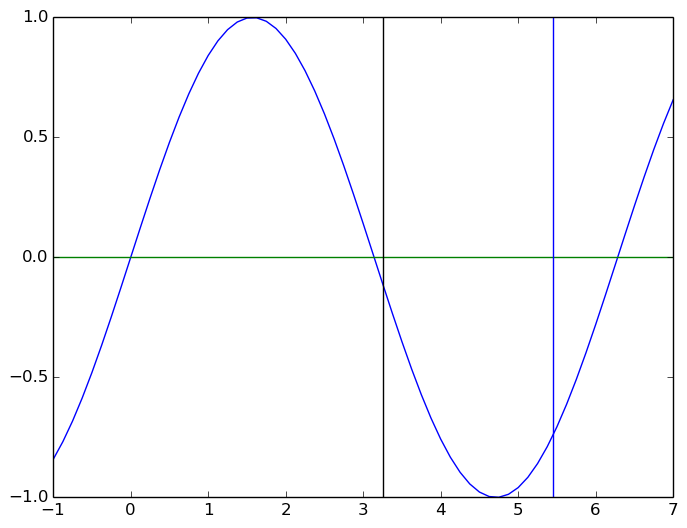

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3e0edb6d0>

In [73]:
x=-1:0.125:7
y=sin(x)

PyPlot.plot(x,y)
PyPlot.plot(x,zeros(x))
PyPlot.plot(float64(redonDOWN(mod1,asdf.a,2*π))*[1,1],[-1,1],"black")
PyPlot.plot(float64(redonUP(mod1,asdf.b,2*π))*[1,1],[-1,1],"blue")

#[3]
#### La extensión natural del intervalo para $f(x)=x/(1+x^2)$ es $F(\mathbf{x})=\mathbf{x}/(1+\mathbf{x}^2)$. ¿Cuál es la extensión natural del intervalo para $\mathbf{x}=[1,2]$? ¿Cómo se compara con el rango $R(f;[1,2])$. Ilustra los resultados con una gráfica.

In [8]:
disper(x)=x/(1+x^2)

disper (generic function with 1 method)

La extención natural es:

In [9]:
disper(Intervalo(1,2))

[1.999999999999999999999999999999999999999999999999999999999999999999999999999983e-01,
1e+00]

Sin embargo el rango es $R(f;[1,2])=[0.5,0.4]$

In [10]:
(disper(1),disper(2))

(0.5,0.4)

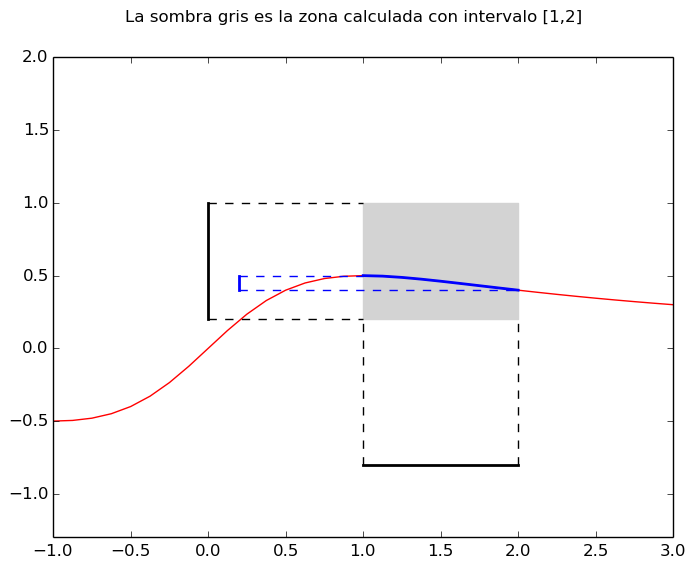

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5ab80c7d50>

In [11]:
graficador(1,2,disper); #la función graficador está en el módulo Graficador en la carpeta MisModulos
#las siguientes líneas son solo para hacer más claro que el rango está contenido en la extensión natural
PyPlot.plot(0.2*[1,1],[disper(1),disper(2)], "blue", linewidth=2.0)
PyPlot.plot([0.2,1],disper(1)*[1,1],"blue", linewidth=1.0, linestyle="--")
PyPlot.plot([0.2,2],disper(2)*[1,1],"blue", linewidth=1.0, linestyle="--")

#[4]
#### Demuestra que $f(x)=(sin(x)−x^2+1)cos(x)$ no tiene raíces en $x=[0,1/2]$. Ilustra que el argumento es correcto gráficamente.

In [12]:
func1(x)=(sin(x)-x^2+1)*cos(x)

func1 (generic function with 1 method)

In [13]:
#Tras definir sin y cos solo hay que hacer:
#in(0.0,func1(Intervalo(0,0.5)))

In [14]:
#graficador(0,0.5,func1); 

# Rutina para encontrar raíces de una función

#[5]
#### Escribe un código quer utiliza la propiedad de los ceros para encontrar los intervalos donde podría haber un cero.

Probemos por ejemplo con la función disper y el intervalo [-1,3]

In [120]:
cerosin(f::Function,x::Intervalo)= in(0.0,f(x))

function parteIntervalo(x::Intervalo)
    a1=redonUP(/ , redonUP(+,x.a,x.b) , 2) #uso el redondeo para no dejar fuera números
    b1=redonDOWN(/ , redonDOWN(+,x.a,x.b) , 2)
    #[Intervalo(x.a,a1),Intervalo(b1,x.b)]
    [Intervalo(x.a,a1),Intervalo(b1,x.b)]
end

function parteIntervalo3(x::Intervalo)
    medio=parteIntervalo(x)
    cuarto1=parteIntervalo(medio[1])[1]
    cuarto3=parteIntervalo(medio[2])[2]
    cuartoMedio= Intervalo( parteIntervalo(medio[1])[2].a  ,  parteIntervalo(medio[2])[1].b )
    [cuarto1, cuartoMedio, cuarto3]
end

function ceros!(f::Function,x::Intervalo,v::Array{Intervalo,1})
    presicion=2.0^-10
    if cerosin(f,x)==false
        #no hago nada si no hay ceros
    else
        #println("entró $x")#descomenta para debugear :P
        if x.b-x.a < presicion
            #println("no") #descomenta para debugear :P
            #println("hay un cero en $x")
            push!(v,x)
        else
            #println("si") #descomenta para debugear :P
            parInt=parteIntervalo(x)
            if parInt[1]==parInt[2] #este es un límite por si pongo una presición demasiado pequeña o algo así.
                #println("iguales") #descomenta para debugear :P
                #println("hay un cero en $x")
                push!(v,x)
                
                # lo que hago ahora es preguntar si al dividir entre dos ambos intervalos contienen al cero:
                # cerosin(f,1) = cerosin(f,2) = true. Si esto ocurre entonces
                # divido intervalo entre "3" partes no iguales _ __ _ , si no entonces divide entre 2
                # Implementé esto porque si no el resultado eran dos ceros, uno en [-a,0] y otro en [0, a]
                
            elseif cerosin(f,parInt[1])==true && cerosin(f,parInt[2])==true
                #println("centro") #descomenta para debugear :P
                parInt3=parteIntervalo3(x)
                ceros!(f,parInt3[1],v)
                ceros!(f,parInt3[2],v)
                ceros!(f,parInt3[3],v)
            else
                #println("sigue") #descomenta para debugear :P
                ceros!(f,parInt[1],v)
                ceros!(f,parInt[2],v)
            end
        end
    end
end


function buscaPosiblesCeros(f::Function,x::Intervalo) #esta es la función que utilizaré para buscar POSIBLES ceros
    vector=Intervalo[]
    ceros!(f,x,vector)
    return vector #regresa un arreglo con todos los intervalos con posibles ceros
end

buscaPosiblesCeros (generic function with 1 method)

In [121]:
inter3=Intervalo("-1.0","3.0")
inter4=Intervalo("5.1","6.01");

In [124]:
buscaPosiblesCeros(disper,inter4) #si la función regresa arreglo vacío entonces no hay ceros en inter4

0-element Array{Intervalo,1}

In [125]:
buscaPosiblesCeros(disper,inter3)

1-element Array{Intervalo,1}:
 [-2.44140625e-04,
2.44140625e-04]

Podemos decir un poco más si incluímos información sobre los valores de la derivada en el(los) intervalo(s) obtenidos. Supongamos que un intervalo obtenido es $[a,b]$, si el intervalo que se obtiene de evaluar la derivada en el intervalo $f´([a,b])$ NO contiene al cero entonces sabemos que de existir un cero en el intervalo éste debe ser único.

Hay dos maneras de proceder en este punto:
    
    Usar la derivada calculada a mano (ej [6])
    
    Usar el tipo que definimos en notebooks anteriores que calcula la derivada automáticamente (ej [7])

En ambos casos solo podremos saber si la derivada NO se hace cero.
Para obtener un beneficio de esto voy a definir un tipo composito en donde podamos guardar por separado los intervalos con derivada que incluya o no al cero:

In [126]:
type PosiblesCeros
    unicos::Array{Intervalo,1} # la derivada NO incluye al cero
    varios::Array{Intervalo,1} # nótese que un intervalo aquí no implica que de existir ceros en el intervalo deben ser
    # varios, solo dice que pueden o no ser varios
end

#[6]
#### Extiende tu código para utilizar la derivada $f′$, dada a mano, para demostrar (cuando se puede) que el cero es único en el intervalo.

En el caso particular de la función $f(x)=\frac{x}{1+x^2}$ la derivada es: $f´(x)=\frac{1 - x^2}{(1 + x^2)^2}$

In [127]:
disperPrima(x)=(1 - x^2)/(1 + x^2)^2

disperPrima (generic function with 1 method)

Ahora modifico un poco las funciones antes definidas para saber si la derivada NO se hace cero en el intervalo de interes

In [128]:
function buscaCerosDisper(x::Intervalo) #esta función solo sirve para funciones cuya derivada sea disperPrima
    vectorposibles=PosiblesCeros( Intervalo[] , Intervalo[] )
    vector=buscaPosiblesCeros(disper,x)
    for i=1:length(vector)
        if cerosin(disperPrima,vector[i])==false
            push!(vectorposibles.unicos,vector[i])
        else
            push!(vectorposibles.varios,vector[i])
        end
    end
    return vectorposibles
end

buscaCerosDisper (generic function with 1 method)

In [129]:
buscaCerosDisper(inter4)

PosiblesCeros([],[])

In [130]:
buscaCerosDisper(inter3)

PosiblesCeros([[-2.44140625e-04,
2.44140625e-04]],[])

#[7]
#### Utiliza la diferenciación automática del notebook 6 para que no tengas que especificar la derivada a mano.

In [131]:
using AutoDif

Dado que al hacer 'diferenciación automática' se realizan más operaciones y dado que en el cálculo de intervalos más operaciones implican un intervalo resultante mayor, entonces usar esta diferenciación automática es menos eficiente que usar la derivada calculada a mano (exacta). Para ilustrarlo miremos la gráfica siguiente, en la cual usamos la derivada exacta y usamos cálculo con intervalos para saber cual es su extención natural. El intervalo resultante se representa con la línea vertical negra. Por otro lado usamos la diferenciación automática (más cálculo con intervalos) con el mismo fin. El intervalo resultante es representado por la línea roja.

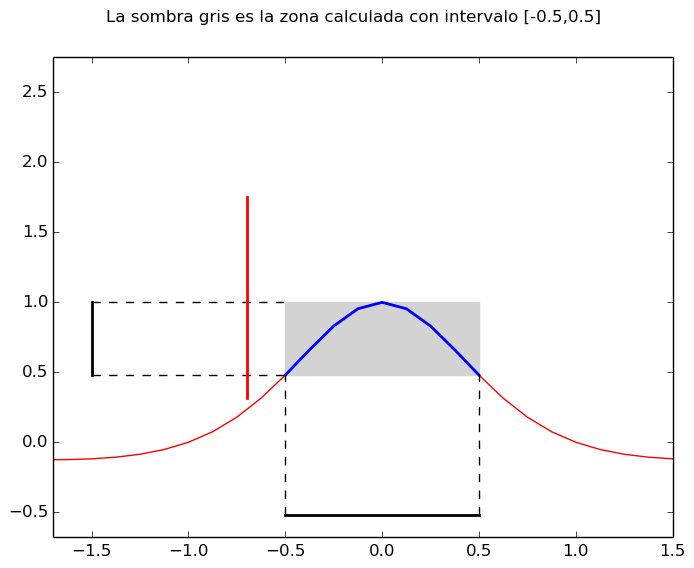

In [132]:
a1=-0.5  #float64(fdsa[1].a)
b1=0.5  #float64(fdsa[1].b)
graficador(a1,b1,disperPrima)
limites=Float64[disper(ValorDeriv(Intervalo(a1,b1))).deriv.a,disper(ValorDeriv(Intervalo(a1,b1))).deriv.b]
PyPlot.plot(-abs(a1)*[1.4,1.4],limites,  "red", linewidth=2.0)
PyPlot.xlim(min(-1,a1-1.2),max(0,b1+1))
PyPlot.ylim(limites[1]-1,limites[2]+1);

Es muy claro que usando la derivada exacta obtenemos intervalos más pequeños. Sin embargo, la ventaja de utilizar la diferenciación automática es justamente que es automática, es decir que no tenemos que calcular nosotros la derivada. En conclusión creo que para funciones sencillas nos conviene usar la idea del ejercicio [6].

A continuación implemento el cálculo con el tipo ValorDeriv del módulo AutoDif.

In [133]:
function buscaCerosAuto(f::Function,x::Intervalo) #esta función utiliza el tipo ValorDeriv definido en el módulo AutoDif
    vectorposibles=PosiblesCeros( Intervalo[] , Intervalo[] )
    derivada(x)=f(ValorDeriv(x)).deriv
    vector=buscaPosiblesCeros(f,x)
    for i=1:length(vector)
        if cerosin(derivada,vector[i])==false
            push!(vectorposibles.unicos,vector[i])
        else
            push!(vectorposibles.varios,vector[i])
        end
    end
    return vectorposibles
end

buscaCerosAuto (generic function with 2 methods)

In [134]:
buscaCerosAuto(disper,inter4)

PosiblesCeros([],[])

In [135]:
buscaCerosAuto(disper,inter3)

PosiblesCeros([[-2.44140625e-04,
2.44140625e-04]],[])

# Un paso más

Hasta ahora nuestras funciones nos regresan intervalos que se dividen en dos tipos:

    Donde la función puede o no tomar el valor cero, pero en caso de que lo tome únicamente puede hacerlo una vez

    Donde la función puede o no tomar el valor cero y puede o no tomarlo más de una vez
    
Para tratar de obtener un poco más de información notemos los siguientes cuatro casos:
    
- $1.\;$ Si f evaluada en extremos no cambia de signo y la derivada no incluye cero en intervalo. Esto indica que en realidad no hay ceros en ese intervalo, por lo que habría que deshechar dicho intervalo.  
- $2.\;$ Si f evaluada en extremos no cambia de signo y la derivada incluye cero en intervalo. Esto indica que en el intervalo puede o no ( ¬¬ ) haber un cero de f.
- $3.\;$ Si f evaluada en extremos cambia de signo y la derivada no incluye cero en intervalo. Esto quiere decir que hay únicamente UN cero en el intervalo.
- $4.\;$ Si f evaluada en extremos cambia de signo y la derivada incluye cero en intervalo. Esto indica que en el intervalo hay al menos un cero (pero podría haber más).


Sin embargo no es tan simple, ya que no podemos (¿debemos?) evaluar nuestra función en valores flotantes, sólo en intervalos, por lo que en los casos anteriores para distinguir los casos distintos de `f evaluada en extremos`, lo que debemos hacer es evaluarlos de la siguiente manera: Supongamos que el intervalo de interes es $x=[x.a,x.b]$, normalmente para evaluar en extremos haríamos $f(x.a)$ y $f(x.b)$, en lugar de esto lo que hacemos es:

\begin{align}
    f(x.a) & \rightarrow f(Intervalo(x.a)) \\
    f(x.b) & \rightarrow f(Intervalo(x.b))
\end{align}

Ahora, si $f(Intervalo(x.a))$ y $f(Intervalo(x.b))$ resultan en un intervalos que NO contienen al cero, quiere decir que sabemos con certeza el signo de la función en los extremos del intervalo, por lo que podemos usar los 4 casos listados anteriormente.

Si $f(Intervalo(x.a))$ o $f(Intervalo(x.b))$ resultan en intervalos que contienen al cero, entonces regresamos a los casos de los ejercicios [6] y [7], por lo que a los 4 casos anteriores añado 2 casos más:

- $5.\;$ Si $0\in f(extremo)$ y la derivada NO incluye al cero (caso PosiblesCeros.unicos)
- $6.\;$ Si $0\in f(extremo)$ y la derivada incluye al cero (caso PosiblesCeros.varios)

Nótese que el caso 6 y el caso 2 dan la misma información.

Para dividir estos nuevos casos defino un nuevo tipo composito que sea algo como:

In [159]:
type Ceros
    posiblesUnicos::Array{Intervalo,1} # Para el caso 5
    posiblesUnoOmas::Array{Intervalo,1} # Para el caso 2 y el caso 6
    unicos::Array{Intervalo,1} # Para el caso 3
    unoOmas::Array{Intervalo,1} # Para el caso 4
end

In [226]:
import Base.show

#para hacer más amigable este tipo, cambio la manera en que se despliega
show(io::IO, a::Ceros) = print(io::IO, "posiblesUnicos: $(a.posiblesUnicos)
posiblesUnoOmas: $(a.posiblesUnoOmas)
unicos: $(a.unicos)
unoOmas: $(a.unoOmas)")

Ceros(Intervalo[],Intervalo[],Intervalo[],Intervalo[])

posiblesUnicos: []
posiblesUnoOmas: []
unicos: []
unoOmas: []

En el caso particular de la función `disper` y el intervalo `inter3` esperaría que la función `buscaCeros` regrese algo como :

    Ceros.posiblesUnicos = arreglo vacío
    Ceros.posiblesUnoOmas = arreglo vacío
    Ceros.unicos = el arreglo que obtuve en [7]
    Ceros.unoOmas = arreglo vacío
    
Por último defino entonces la función `buscaCeros` (y un par de funciones auxiliares):

In [222]:
# Esta función me dice si puedo definir con certeza el signo de f en extremos
function signosDefinidos(f::Function,x::Intervalo)
    if cerosin(f,Intervalo(x.a)) || cerosin(f,Intervalo(x.b)) #nótese que evalúo en intervalos, no flotantes
        return false
    else
        return true
    end
end

# Esta me dice si f cambia o no de signo
function cambiaSigno(f::Function,x::Intervalo)
    if f(Intervalo(x.a)).a>0.0 && f(Intervalo(x.b)).a>0.0
        return false
    elseif f(Intervalo(x.a)).a<0.0 && f(Intervalo(x.b)).a<0.0
        return false
    else
        return true
    end
end

# Esta función separa en los casos 1-4 definidos arriba
function separaCasos!(f::Function,deriv::Function,x::Intervalo,cer::Ceros)
    if cambiaSigno(f,x) && cerosin(deriv,x)
        push!(cer.unoOmas,x)  # Caso 4: f cambia de signo y derivada incluye cero
    elseif cambiaSigno(f,x) 
        push!(cer.unicos,x)   # Caso 3: f cambia de signo y derivada NO incluye cero
    elseif cerosin(deriv,x)
        push!(cer.posiblesUnoOmas,x)   # Caso 2: f NO cambia de signo y derivada incluye cero
    end
end



function buscaCeros(f::Function,x::Intervalo)
    vectorceros=Ceros(Intervalo[],Intervalo[],Intervalo[],Intervalo[])
    derivada(x)=f(ValorDeriv(x)).deriv
    vector=buscaPosiblesCeros(f,x)
    for i=1:length(vector)
        if signosDefinidos(f,vector[i])
            separaCasos!(f,derivada,vector[i],vectorceros)            
        elseif cerosin(derivada,vector[i])
            push!(vectorceros.posiblesUnoOmas,vector[i])
        else
            push!(vectorceros.posiblesUnicos,vector[i])
        end
    end
    return vectorceros
end

buscaCeros (generic function with 1 method)

In [223]:
buscaCeros(disper,inter4)

posiblesUnicos: []
posiblesUnoOmas: []
unicos: []
unoOmas: []

In [224]:
buscaCeros(disper,inter3)

posiblesUnicos: []
posiblesUnoOmas: []
unicos: [[-2.44140625e-04,
2.44140625e-04]]
unoOmas: []